In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

import warnings

In [234]:
def plotar_grafico(var_data, var_x, var_y, var_title, var_media_movel=""):
    plt.figure(figsize=(15,5))

    sns.lineplot(x=var_x, y=var_y, data=var_data[:50], palette="tab10", linewidth=1.5)

    if var_media_movel != "":
        sns.lineplot(x='Data', y= var_media_movel, data= var_data[:50])

    plt.title(var_title)
    plt.xticks(rotation= 30)
    plt.show()

In [202]:
url_file = 'E:/DADOS/Marcelo/Bootcamp/DS/analise_previsao_series_temporais/dados/A105613189_28_143_208.csv'

In [459]:
dados = pd.read_csv(url_file, encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=16, engine='python')
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [460]:
dados = dados.drop("Total",axis=1)
dados = dados.drop(19,axis=0)

In [461]:
dados_time_series = dados.melt(id_vars="Ano Diagnóstico", value_name="Casos", var_name="Mes")

dados_time_series['Data'] = dados_time_series["Ano Diagnóstico"] + "-" + dados_time_series["Mes"]


In [462]:
dados_time_series.head()

,Ano Diagnóstico,Mes,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan


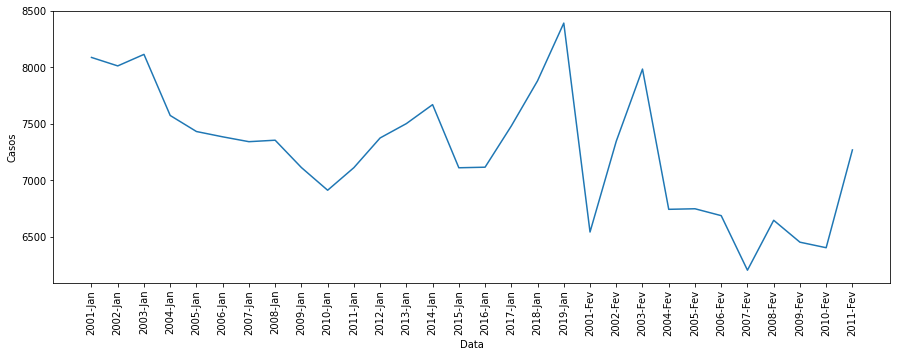

In [463]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_time_series[:30])

plt.xticks(rotation= 90)
plt.show()

In [464]:
dados_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mes              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


In [42]:
#dados_time_series['data_new'] = dados_time_series['data'].map(str) + '-01'

In [465]:
meses_dict = {'Jan':'Jan',
                'Fev':'Feb',
                'Mar':'Mar',
                'Abr':'Apr',
                'Mai':'May',
                'Jun':'Jun',
                'Jul':'Jul',
                'Ago':'Aug',
                'Set':'Sep',
                'Out':'Oct',
                'Nov':'Nov',
                'Dez':'Dec'}

In [466]:
meses_dict_number = {'Jan':1,
                'Feb':2,
                'Mar':3,
                'Apr':4,
                'May':5,
                'Jun':6,
                'Jul':7,
                'Aug':8,
                'Sep':9,
                'Oct':10,
                'Nov':11,
                'Dec':12}

In [467]:
dados_time_series['Mes'] = dados_time_series['Mes'].map(meses_dict)

In [468]:
dados_time_series.sample(5)

,Ano Diagnóstico,Mes,Casos,Data
209,2001,Dec,6627,2001-Dez
13,2014,Jan,7670,2014-Jan
75,2019,Apr,8274,2019-Abr
164,2013,Sep,7377,2013-Set
79,2004,May,7763,2004-Mai


In [469]:
dados_time_series['Data'] = dados_time_series["Ano Diagnóstico"] + "-" + dados_time_series["Mes"]

In [470]:
dados_time_series['Data'] = pd.to_datetime(dados_time_series['Data'])

In [471]:
#dados_time_series['Mes'] = dados_time_series['Data'].map(dados_time_series['Data'].dt.month)

In [472]:
dados_time_series['Mes'] = dados_time_series['Mes'].map(meses_dict_number)


In [473]:
dados_time_series = dados_time_series[['Data','Casos','Mes']]

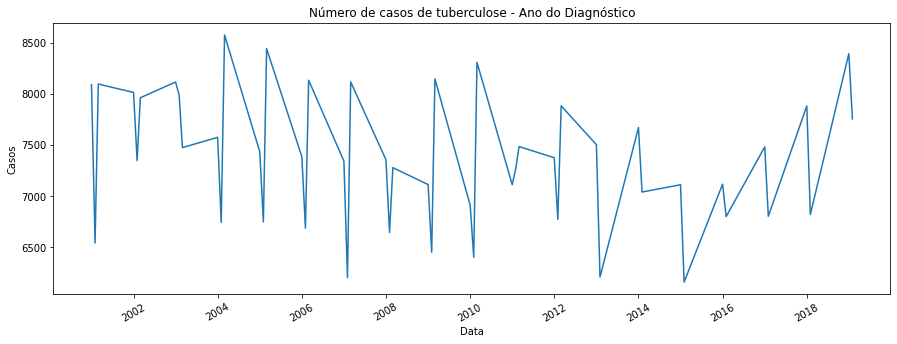

In [474]:
plotar_grafico(dados_time_series, 'Data', 'Casos', 'Número de casos de tuberculose - Ano do Diagnóstico')

In [475]:
#ordenar o dataset pela data
dados_time_series =  dados_time_series.sort_values(by=['Data'])

dados_time_series = dados_time_series.reset_index(drop= True)

In [476]:
dados_time_series.head()

,Data,Casos,Mes
0,2001-01-01,8088,1
1,2001-02-01,6542,2
2,2001-03-01,8095,3
3,2001-04-01,7305,4
4,2001-05-01,7656,5


In [477]:
dados_time_series['MM_3'] = dados_time_series['Casos'].rolling(3).mean()

In [478]:
dados_time_series['MM_6'] = dados_time_series['Casos'].rolling(6).mean()

In [479]:
dados_time_series['MM_3c'] = dados_time_series['Casos'].rolling(3, center= True).mean()

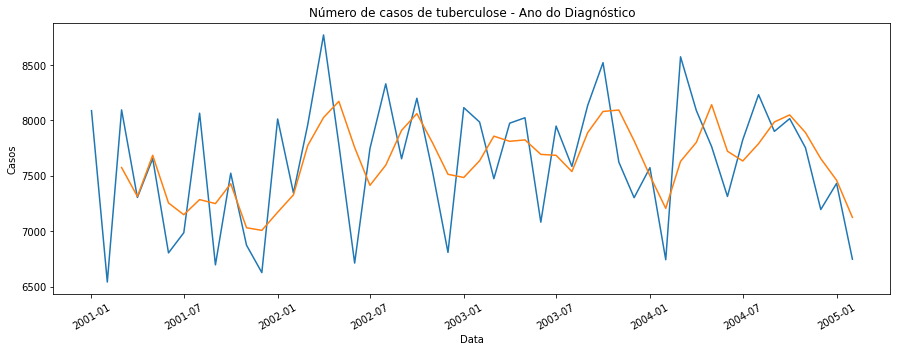

In [480]:
plotar_grafico(dados_time_series, 'Data', 'Casos', 'Número de casos de tuberculose - Ano do Diagnóstico','MM_3')

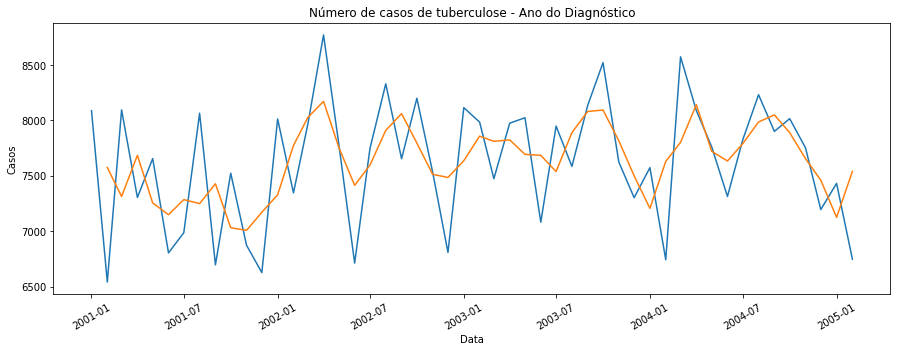

In [481]:
plotar_grafico(dados_time_series, 'Data', 'Casos', 'Número de casos de tuberculose - Ano do Diagnóstico','MM_3c')

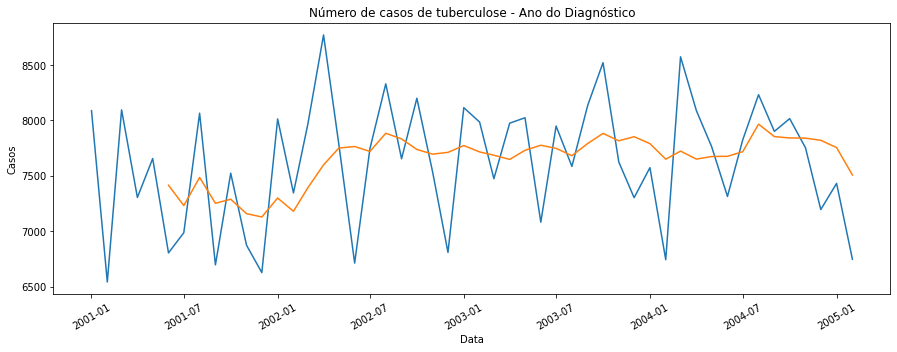

In [482]:
plotar_grafico(dados_time_series, 'Data', 'Casos', 'Número de casos de tuberculose - Ano do Diagnóstico','MM_6')

## Desafio 01: Transformar os dados em uma série temporal: ANO-MES

## Desafio 02: Converter a coluna data para o tipo datetime

## Desafio 03: Realizar os mesmos processos de transformação dos dados para a base de dados de Hanseníase

## Desafio 04: Deixar o gráfico da série temporal visualmente melhor

## Desafio 05: Analisar outras janelas para média móvel.

## Desafio 06: Realizar sua primeira previsão utilizando médias( toda a série, 3 últimos meses)

In [543]:
dados_time_series.tail(1)

,Data,Casos,Mes,MM_3,MM_6,MM_3c
227,2019-12-01,7220,12,7809.0,8031.833333,NaN


In [557]:
media_total =  dados_time_series.tail(1) #dados_time_series.copy()
media_total = media_total.append({'Data': '2020-01-01', 'Casos': dados_time_series['Casos'].mean()}, ignore_index=True)
media_total['Data'] = pd.to_datetime(media_total['Data'])
media_total

,Data,Casos,Mes,MM_3,MM_6,MM_3c
0,2019-12-01,7220.000000,12.0,7809.0,8031.833333,NaN
1,2020-01-01,7389.285088,NaN,NaN,NaN,NaN


In [485]:
dados_time_series2 = dados_time_series.copy()
dados_time_series2['Casos_Ultimo_Mes'] = dados_time_series2['Casos'].shift()
dados_time_series2['Diff_Casos_Ultimo_Mes'] = dados_time_series2['Casos_Ultimo_Mes'].diff()
dados_time_series2 = dados_time_series2.dropna()
dados_time_series2.head()

,Data,Casos,Mes,MM_3,MM_6,MM_3c,Casos_Ultimo_Mes,Diff_Casos_Ultimo_Mes
5,2001-06-01,6805,6,7255.333333,7415.166667,7149.333333,7656.0,351.0
6,2001-07-01,6987,7,7149.333333,7231.666667,7285.666667,6805.0,-851.0
7,2001-08-01,8065,8,7285.666667,7485.500000,7249.666667,6987.0,182.0
8,2001-09-01,6697,9,7249.666667,7252.500000,7428.666667,8065.0,1078.0
9,2001-10-01,7524,10,7428.666667,7289.000000,7031.666667,6697.0,-1368.0


In [486]:
dados_time_series2.tail()

,Data,Casos,Mes,MM_3,MM_6,MM_3c,Casos_Ultimo_Mes,Diff_Casos_Ultimo_Mes
222,2019-07-01,8382,7,8042.666667,7967.333333,7994.666667,7363.0,-1020.0
223,2019-08-01,8239,8,7994.666667,8048.166667,8254.666667,8382.0,1019.0
224,2019-09-01,8143,9,8254.666667,8130.666667,8324.666667,8239.0,-143.0
225,2019-10-01,8592,10,8324.666667,8183.666667,8116.666667,8143.0,-96.0
226,2019-11-01,7615,11,8116.666667,8055.666667,7809.000000,8592.0,449.0


In [354]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [487]:
#dados_time_series2.query('Data >= "2019-09-01"')['Mes']
dados_time_series2.query('Data >= "2019-08-01"')[dados_time_series2['Mes'] < month]

,Data,Casos,Mes,MM_3,MM_6,MM_3c,Casos_Ultimo_Mes,Diff_Casos_Ultimo_Mes
223,2019-08-01,8239,8,7994.666667,8048.166667,8254.666667,8382.0,1019.0
224,2019-09-01,8143,9,8254.666667,8130.666667,8324.666667,8239.0,-143.0
225,2019-10-01,8592,10,8324.666667,8183.666667,8116.666667,8143.0,-96.0


In [414]:
mean_error = []
for month in range(9,12):
    train = dados_time_series2.query('Data >= "2019-08-01"')[dados_time_series2['Mes'] < month]
    val = dados_time_series2.query('Data >= "2019-08-01"')[dados_time_series2['Mes'] == month]
    
    p = val['Casos_Ultimo_Mes'].values
    
    error = rmsle(val['Casos'].values, p)
    print('Mes %d - Erro %.5f' % (month, error))
    mean_error.append(error)
print('Média Erro = %.5f' % np.mean(mean_error))

Mes 9 - Erro 0.01172
Mes 10 - Erro 0.05367
Mes 11 - Erro 0.12070
Média Erro = 0.06203


In [415]:
train

,Data,Casos,Mes,MM_3,MM_6,MM_3c,Casos_Ultimo_Mes,Diff_Casos_Ultimo_Mes
223,2019-08-01,8239,8,7994.666667,8048.166667,8254.666667,8382.0,1019.0
224,2019-09-01,8143,9,8254.666667,8130.666667,8324.666667,8239.0,-143.0
225,2019-10-01,8592,10,8324.666667,8183.666667,8116.666667,8143.0,-96.0


In [416]:
val

,Data,Casos,Mes,MM_3,MM_6,MM_3c,Casos_Ultimo_Mes,Diff_Casos_Ultimo_Mes
226,2019-11-01,7615,11,8116.666667,8055.666667,7809.0,8592.0,449.0


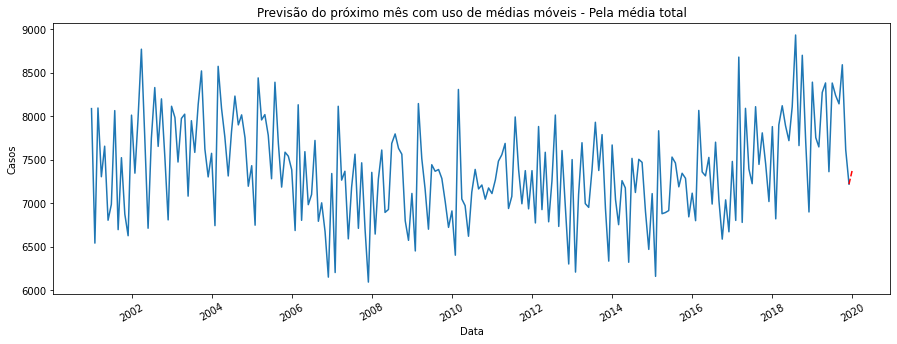

In [569]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_time_series, palette="tab10", linewidth=1.5)
plt.plot(media_total.Data, media_total.Casos, 'r--')

plt.title('Previsão do próximo mês com uso de médias móveis - Pela média total')
plt.xticks(rotation= 30)
plt.show()

In [562]:
media = dados_time_series['Casos'].tail(3).mean()

media_ultimos_meses = dados_time_series.tail(1)
media_ultimos_meses = media_ultimos_meses.append({'Data': '2020-01-01', 'Casos': media}, ignore_index=True)
media_ultimos_meses['Data'] = pd.to_datetime(media_ultimos_meses['Data'])
media_ultimos_meses

,Data,Casos,Mes,MM_3,MM_6,MM_3c
0,2019-12-01,7220.0,12.0,7809.0,8031.833333,NaN
1,2020-01-01,7809.0,NaN,NaN,NaN,NaN


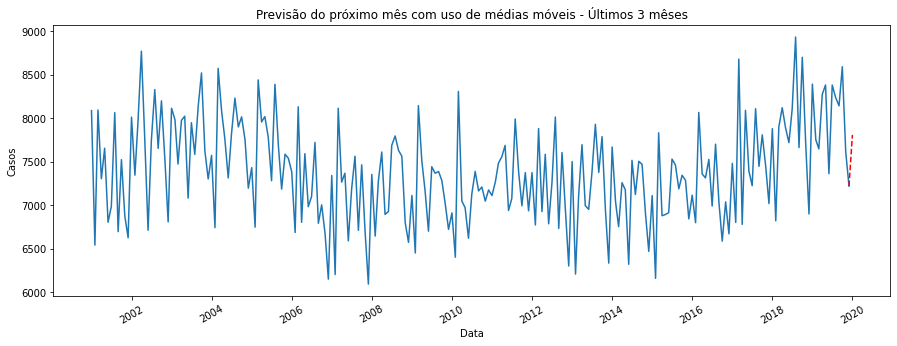

In [564]:
plt.figure(figsize=(15,5))

sns.lineplot(x='Data', y='Casos', data=dados_time_series, palette="tab10", linewidth=1.5)
plt.plot(media_ultimos_meses.Data, media_ultimos_meses.Casos, 'r--')

plt.title('Previsão do próximo mês com uso de médias móveis - Últimos 3 mêses')
plt.xticks(rotation= 30)
plt.show()